#Project Objectives
##1. Identify the most common causes of flight delays.
##2. Compare airline and airport performance (best vs. worst).
##3. Discover seasonal patterns in delays and cancellations.

# Data Import


In [47]:
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
data = pd.read_csv("/content/drive/MyDrive/filght delay eda/Airline_Delay_Cause.csv")
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,5.84,0.0,0.0,732.0,47.0,90.0,19.0,0.0,576.0
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,4.94,0.0,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,0.0,15.48,5.0,3.0,1596.0,143.0,52.0,468.0,0.0,933.0
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,12.92,2.0,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,4.83,1.0,0.0,720.0,86.0,154.0,191.0,0.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45225,2023,1,ZW,Air Wisconsin Airlines Corp,STL,"St. Louis, MO: St Louis Lambert International",2.0,1.0,0.00,1.00,...,0.0,0.00,0.0,0.0,38.0,0.0,38.0,0.0,0.0,0.0
45226,2023,1,ZW,Air Wisconsin Airlines Corp,SYR,"Syracuse, NY: Syracuse Hancock International",31.0,6.0,3.49,0.00,...,0.0,1.84,0.0,0.0,1018.0,739.0,0.0,34.0,0.0,245.0
45227,2023,1,ZW,Air Wisconsin Airlines Corp,TUL,"Tulsa, OK: Tulsa International",27.0,6.0,1.94,0.00,...,0.0,1.82,0.0,0.0,204.0,48.0,0.0,51.0,0.0,105.0
45228,2023,1,ZW,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI: Cherry Capital",62.0,17.0,2.65,0.00,...,0.0,9.81,4.0,0.0,1485.0,250.0,0.0,287.0,0.0,948.0


In [49]:
data_labels = pd.read_excel("/content/drive/MyDrive/filght delay eda/Download_Column_Definitions.xlsx")
data_labels

,Column Name,Column Definition
0,year,YYYY format
1,month,MM format (1-12)
2,carrier,Code assigned by assigned by US DOT to identif...
3,carrier_name,Unique airline (carrier) is defined as one hol...
4,airport,A three character alpha-numeric code issued by...
5,airport_name,a place from which aircraft operate that usual...
6,arr_flights,Arrival Flights
7,arr_del15,"Arrival Delay Indicator, 15 Minutes or More Ar..."
8,carrier_ct,Carrier Count for airline cause of delay
9,weather_ct,Weather Count for airline cause of delay


# Data Understanding

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45230 entries, 0 to 45229
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 45230 non-null  int64  
 1   month                45230 non-null  int64  
 2   carrier              45230 non-null  object 
 3   carrier_name         45230 non-null  object 
 4   airport              45230 non-null  object 
 5   airport_name         45230 non-null  object 
 6   arr_flights          45167 non-null  float64
 7   arr_del15            45156 non-null  float64
 8   carrier_ct           45167 non-null  float64
 9   weather_ct           45167 non-null  float64
 10  nas_ct               45167 non-null  float64
 11  security_ct          45167 non-null  float64
 12  late_aircraft_ct     45167 non-null  float64
 13  arr_cancelled        45167 non-null  float64
 14  arr_diverted         45167 non-null  float64
 15  arr_delay            45167 non-null 

In [51]:
data.shape

(45230, 21)

#Data Cleaning

In [52]:
data = data.dropna()

In [53]:
data.duplicated().sum()

np.int64(0)

In [54]:
data.isnull().sum()


,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


#Question 1: Identify the most common causes of flight delays.


##No. of Flights by Month




<ipython-input-55-5ea2fce234a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']= data['year'].astype(str)
<ipython-input-55-5ea2fce234a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']= data['month'].astype(str).str.zfill(2)
<ipython-input-55-5ea2fce234a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

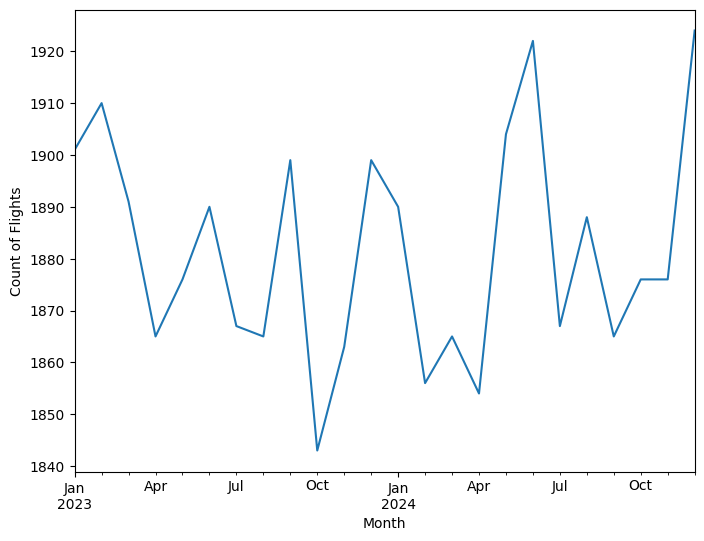

In [55]:
data['year']= data['year'].astype(str)
data['month']= data['month'].astype(str).str.zfill(2)
data['year_month'] = data['year'] + '-' + data['month']

data['year_month'] = pd.to_datetime(data['year_month'], format='%Y-%m')

plt.figure(figsize=(8, 6))
data['year_month'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count of Flights')
plt.show(plt, 'Flights Per Month')

##Delay Counts over Time

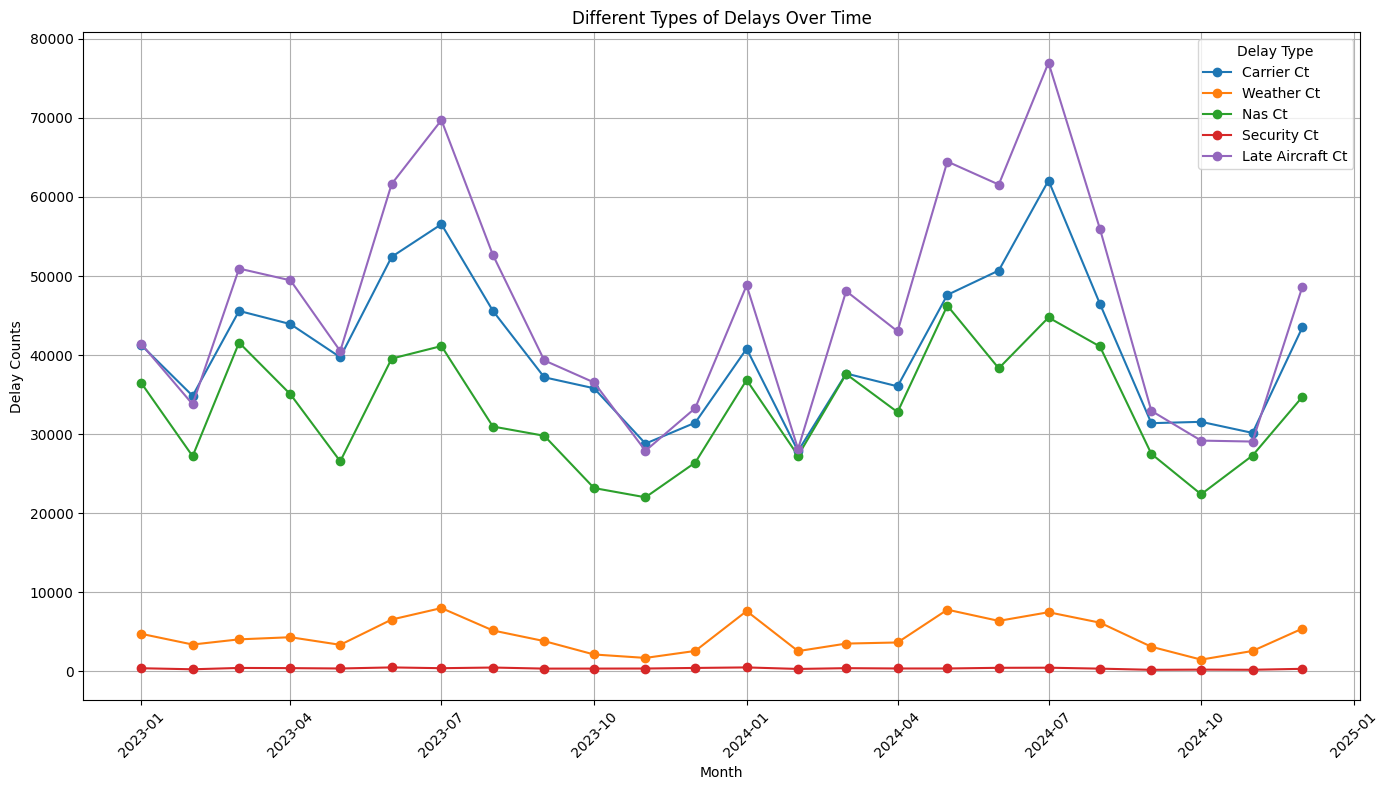

In [56]:
import matplotlib.pyplot as plt

# List of delay count columns
delay_columns = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Group the data: sum each delay type per year_month
delay_over_time = data.groupby('year_month')[delay_columns].sum()

# Plot
plt.figure(figsize=(14,8))

for col in delay_columns:
    plt.plot(delay_over_time.index, delay_over_time[col], marker='o', label=col.replace('_', ' ').title())

plt.xlabel('Month')
plt.ylabel('Delay Counts')
plt.title('Different Types of Delays Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()


##Delay Distribution over Time

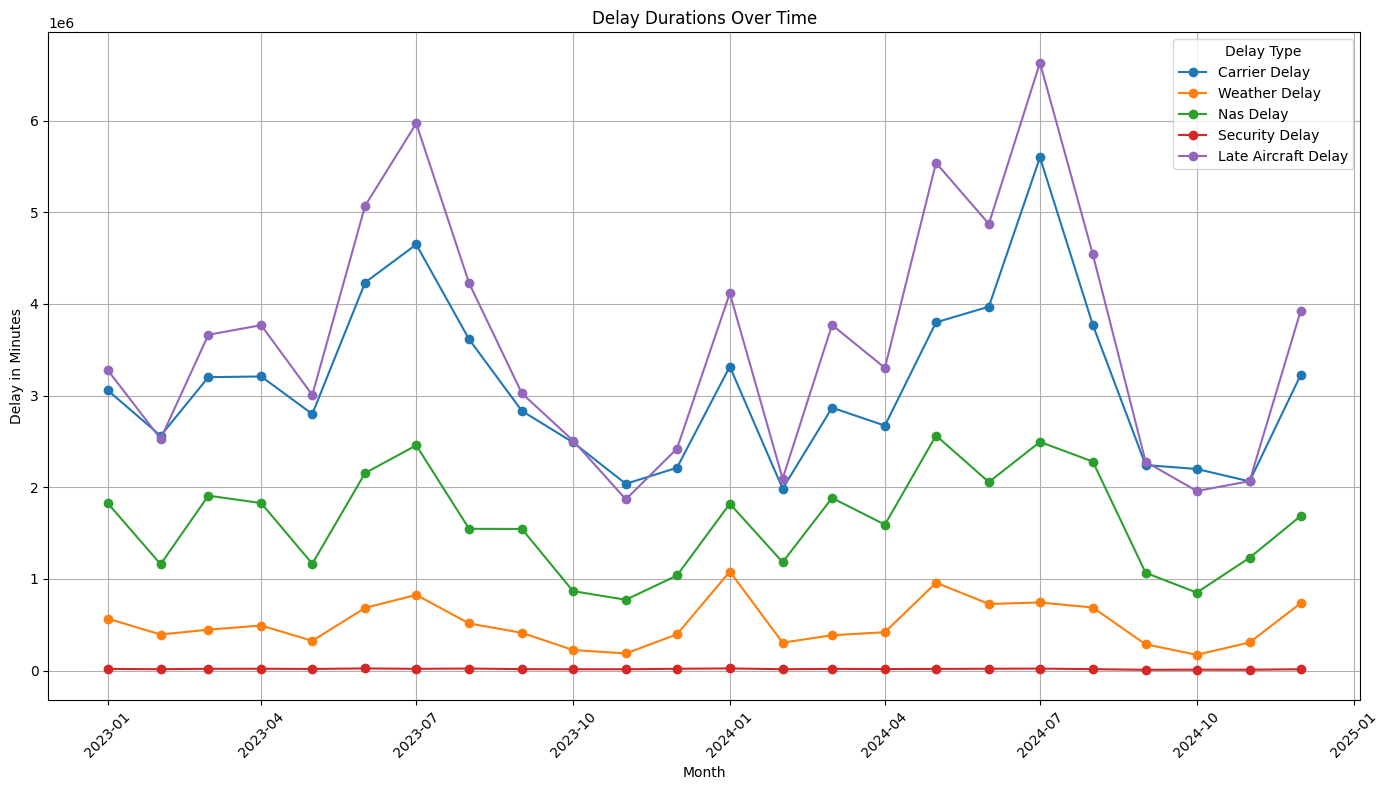

In [57]:
import matplotlib.pyplot as plt

# List of delay duration columns
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Group the data: sum each delay type per year_month
delay_over_time = data.groupby('year_month')[delay_columns].sum()

# Plot
plt.figure(figsize=(14,8))

for col in delay_columns:
    plt.plot(delay_over_time.index, delay_over_time[col], marker='o', label=col.replace('_', ' ').title())

plt.xlabel('Month')
plt.ylabel('Delay in Minutes')
plt.title('Delay Durations Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()


##Total Delays over Time

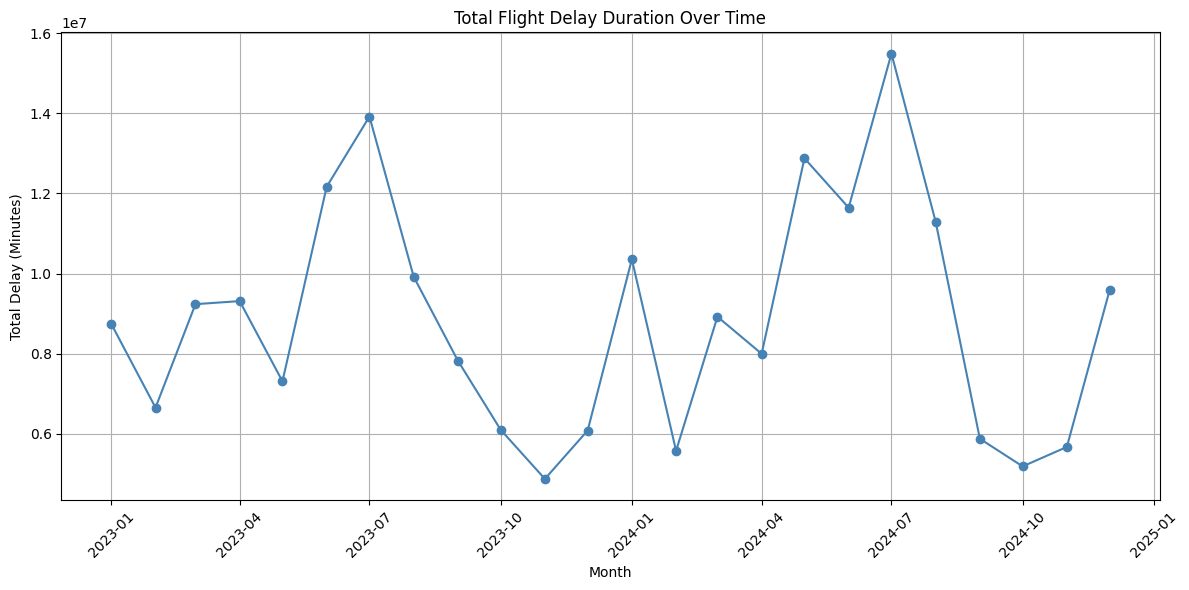

In [58]:
import matplotlib.pyplot as plt

# List of delay duration columns
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Group the data: sum all delay durations per month
total_delay_over_time = data.groupby('year_month')[delay_columns].sum().sum(axis=1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(total_delay_over_time.index, total_delay_over_time.values, marker='o', color='steelblue')

plt.xlabel('Month')
plt.ylabel('Total Delay (Minutes)')
plt.title('Total Flight Delay Duration Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##Biggest delay causes


In [60]:
# Sum delays by cause of delay
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

total_delay_causes = data[delay_columns].mean()

# Find the biggest delay causes (highest sum)
print(total_delay_causes.sort_values(ascending=False))


late_aircraft_delay    1913.678913
carrier_delay          1651.828860
nas_delay               862.704270
weather_delay           271.338449
security_delay            8.717114
dtype: float64


#Question 2: Compare airport performance based on flight delays and cancellations.


##Cancelled Flights over Time

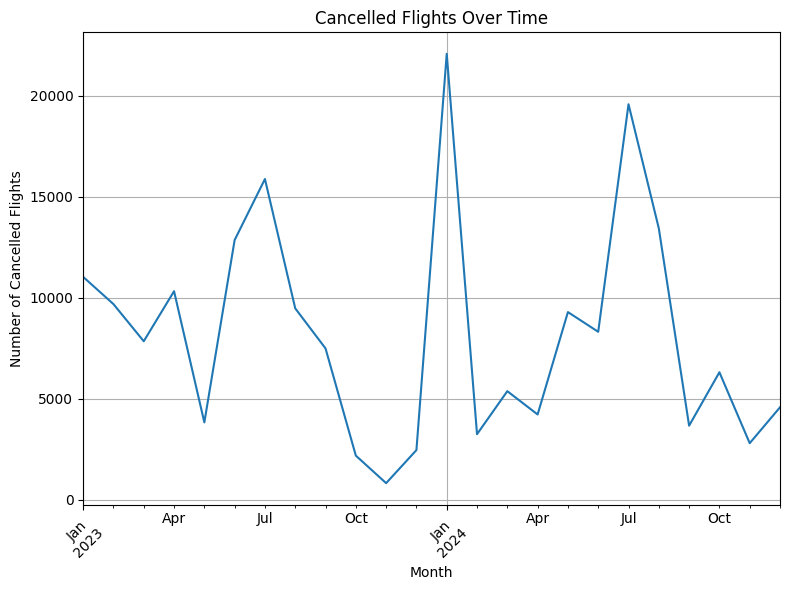

In [61]:
plt.figure(figsize=(8, 6))
data.groupby('year_month')['arr_cancelled'].sum().plot(kind='line')

plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Cancelled Flights Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##Airports with the least no of flight cancellations


<ipython-input-62-0771d7c12053>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

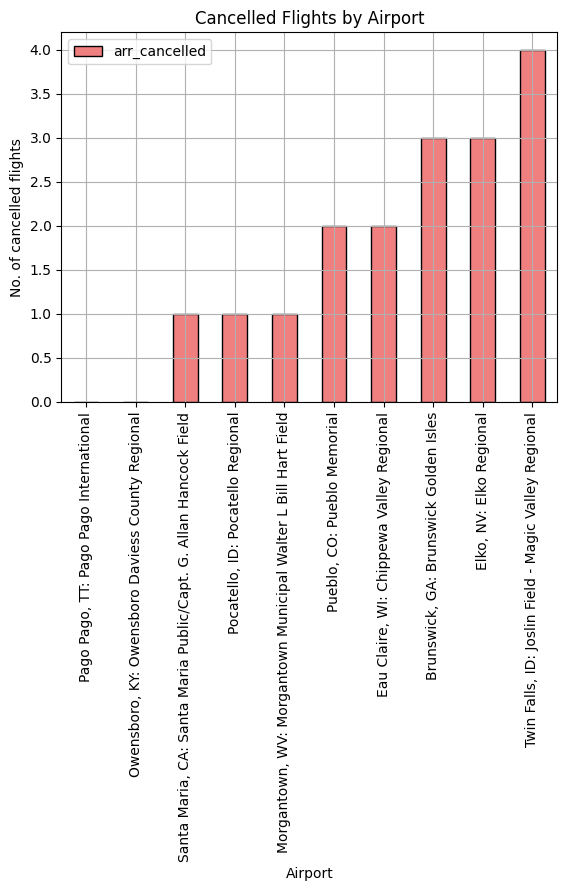

In [62]:
# Group by airport and calculate the average delay
avg_delay_airport = data.groupby('airport_name')[['arr_cancelled']].sum().sort_values(by='arr_cancelled').head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
avg_delay_airport.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Cancelled Flights by Airport')
plt.xlabel('Airport')
plt.ylabel('No. of cancelled flights')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Group by Airport to calculate cancellations
cancellations_by_airport = data.groupby('airport_name')['arr_cancelled'].sum().sort_values(ascending=False)

# Print or plot the top 10 performing airports
print(cancellations_by_airport.tail(10))  # Top 10 airports


airport_name
Stockton, CA: Stockton Metro                                        4.0
Elko, NV: Elko Regional                                             3.0
Brunswick, GA: Brunswick Golden Isles                               3.0
Pueblo, CO: Pueblo Memorial                                         2.0
Eau Claire, WI: Chippewa Valley Regional                            2.0
Morgantown, WV: Morgantown Municipal Walter L Bill Hart Field       1.0
Pocatello, ID: Pocatello Regional                                   1.0
Santa Maria, CA: Santa Maria Public/Capt. G. Allan Hancock Field    1.0
Pago Pago, TT: Pago Pago International                              0.0
Owensboro, KY: Owensboro Daviess County Regional                    0.0
Name: arr_cancelled, dtype: float64


##Airports with the least amount of flight delays



In [63]:
# Group by Airport to calculate average delays
avg_delay_airport = data.groupby('airport_name')['arr_delay'].mean().sort_values(ascending=False).tail(10)

# Plot the top 10 performing airports
print(avg_delay_airport.tail(10))  # Top 10 airports


airport_name
King Salmon, AK: King Salmon Airport                                237.416667
Santa Maria, CA: Santa Maria Public/Capt. G. Allan Hancock Field    233.000000
Wenatchee, WA: Pangborn Memorial                                    210.416667
Yakima, WA: Yakima Air Terminal/McAllister Field                    200.416667
Gustavus, AK: Gustavus Airport                                      179.333333
Pago Pago, TT: Pago Pago International                              138.166667
Saipan, TT: Francisco C. Ada Saipan International                    99.166667
Pueblo, CO: Pueblo Memorial                                          84.000000
Adak Island, AK: Adak                                                56.125000
St. Cloud, MN: St. Cloud Regional                                    45.684211
Name: arr_delay, dtype: float64


<ipython-input-59-97a3f9db9bb2>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

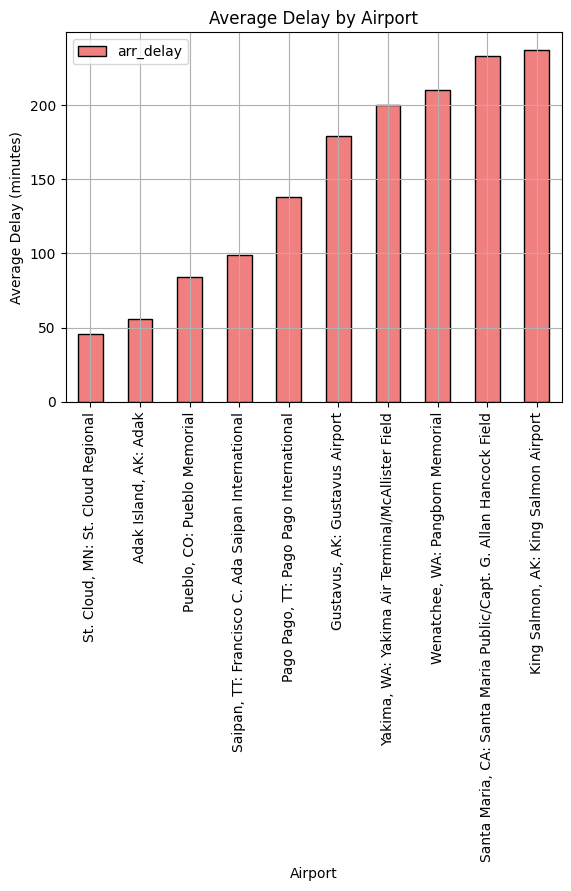

In [59]:
# Group by airport and calculate the average delay
avg_delay_airport = data.groupby('airport_name')[['arr_delay']].mean().sort_values(by='arr_delay').head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
avg_delay_airport.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Delay by Airport')
plt.xlabel('Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


#Question 3: Discover seasonal patterns in delays and cancellations.

##When are flights most likely to be delayed or canceled?

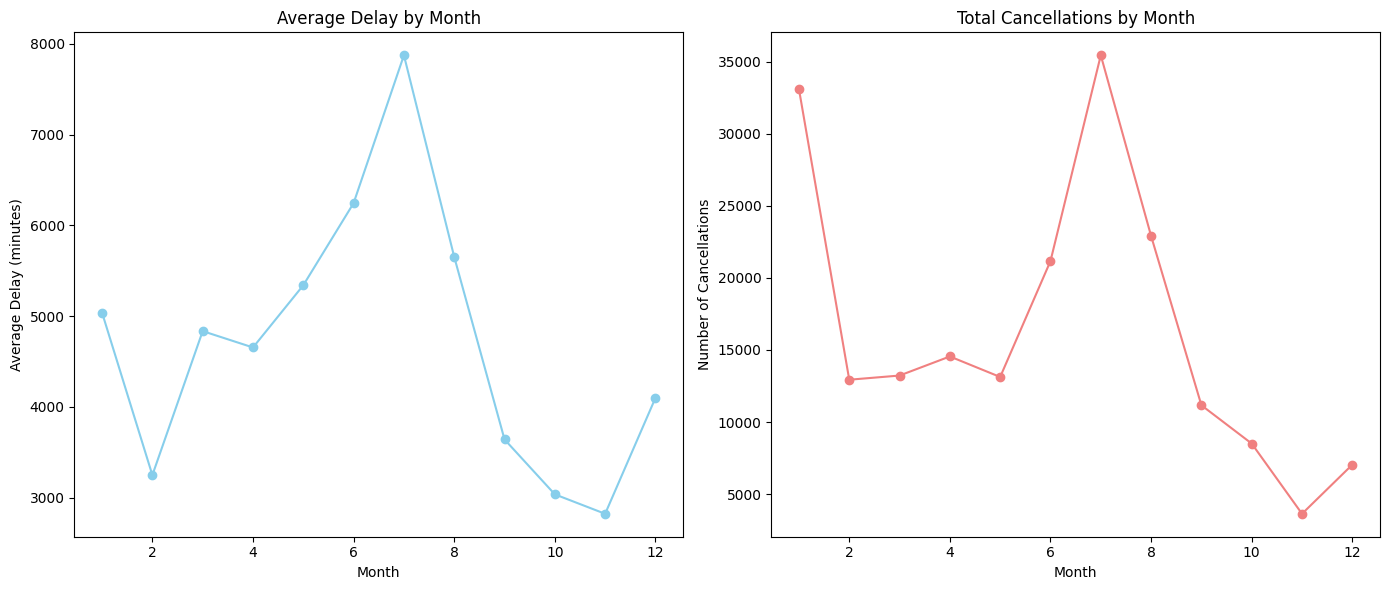

In [65]:
# Analyze delays and cancellations by month (seasonality check)
delay_by_month = data.groupby(data['year_month'].dt.month)['arr_delay'].mean()  # average delay per month
cancellations_by_month = data.groupby(data['year_month'].dt.month)['arr_cancelled'].sum()  # cancellations per month

# Plot delays and cancellations by month
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(delay_by_month, marker='o', color='skyblue')
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')

plt.subplot(1, 2, 2)
plt.plot(cancellations_by_month, marker='o', color='lightcoral')
plt.title('Total Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')

plt.tight_layout()
plt.show()


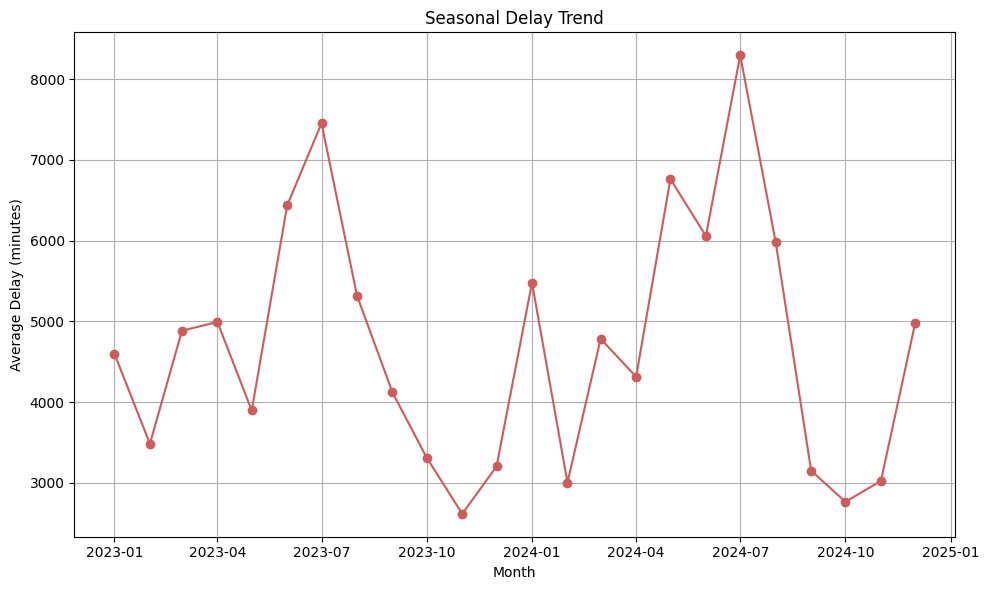

In [66]:
# Grouping by month to check for seasonal patterns
seasonal_delay = data.groupby(data['year_month'])['arr_delay'].mean()

# Plot the seasonal delay trend
plt.figure(figsize=(10, 6))
plt.plot(seasonal_delay, marker='o', color='indianred')
plt.title('Seasonal Delay Trend')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


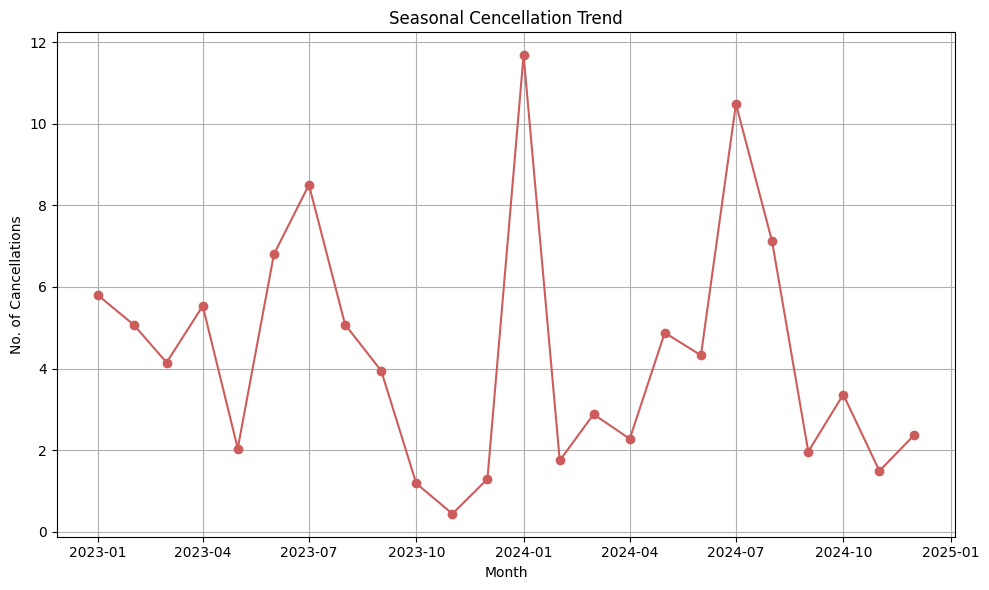

In [67]:
# Grouping by month to check for seasonal patterns
seasonal_delay = data.groupby(data['year_month'])['arr_cancelled'].mean()

# Plot the seasonal delay trend
plt.figure(figsize=(10, 6))
plt.plot(seasonal_delay, marker='o', color='indianred')
plt.title('Seasonal Cencellation Trend')
plt.xlabel('Month')
plt.ylabel('No. of Cancellations')
plt.grid(True)
plt.tight_layout()
plt.show()


#Key Visual Insights
---
##1. Top Delay Causes: Late aircraft is the largest contributor (~40% of delay minutes)
##2. Airport performance:
##St. Cloud, MN: St. Cloud Regional has the least average delay of 45.68 minutes
##Owensboro, KY: Owensboro Daviess County Regional and Pago Pago, TT: Pago Pago International has the least no. of cancelled flights
##3. Seasonal Trends:
##December–January: Peak in late aircraft delays
##July–August: Cancellation rates nearly double
